In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"D:\netflix_data.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV
...,...,...,...,...,...,...,...,...,...,...,...
4807,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,88,Looking to survive in a world taken over by zo...,Comedies
4808,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,94,A drug dealer starts having doubts about his t...,Dramas
4809,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,88,"Dragged from civilian life, a former superhero...",Children
4810,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas


Overview data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [4]:
df['release_year'].value_counts()

release_year
2017    646
2018    624
2016    562
2019    488
2020    379
       ... 
1963      1
1942      1
1947      1
1944      1
1959      1
Name: count, Length: 71, dtype: int64

Filter the data for movies released in the 1990s

In [4]:
movies1990s = df['release_year'].between(1990, 1999)
df_90s = df[movies1990s]
df_90s
df_90s['release_year'].value_counts()

release_year
1997    26
1998    26
1999    26
1993    16
1995    16
1992    16
1990    15
1996    15
1994    14
1991    14
Name: count, dtype: int64

In [16]:
df_90s.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
6,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,119,After one of his high school students attacks ...,Dramas
118,s167,Movie,A Dangerous Woman,Stephen Gyllenhaal,"Debra Winger, Barbara Hershey, Gabriel Byrne, ...",United States,"April 1, 2018",1993,101,At the center of this engrossing melodrama is ...,Dramas
145,s211,Movie,A Night at the Roxbury,John Fortenberry,"Will Ferrell, Chris Kattan, Dan Hedaya, Molly ...",United States,"December 1, 2019",1998,82,"After a run-in with Richard Grieco, dimwits Do...",Comedies
167,s239,Movie,A Thin Line Between Love & Hate,Martin Lawrence,"Martin Lawrence, Lynn Whitfield, Regina King, ...",United States,"December 1, 2020",1996,108,When a philandering club promoter sets out to ...,Comedies
194,s274,Movie,Aashik Awara,Umesh Mehra,"Saif Ali Khan, Mamta Kulkarni, Mohnish Bahl, S...",India,"June 1, 2017",1993,154,"Raised by a kindly thief, orphaned Jimmy goes ...",Dramas


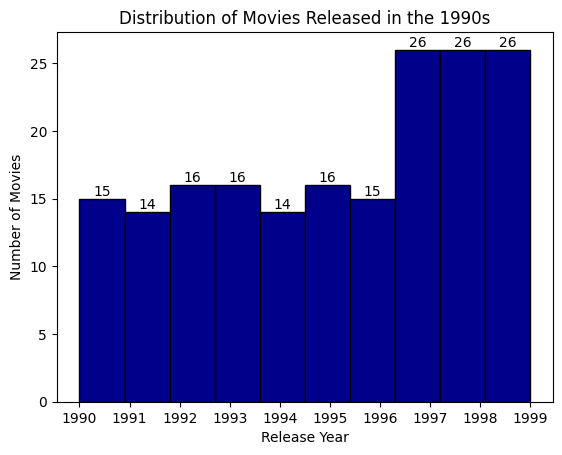

In [16]:
counts, bins, _ = plt.hist(df_90s['release_year'], bins=10, color='darkblue', edgecolor='black')
plt.title('Distribution of Movies Released in the 1990s')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(range(1990, 2000))

for i, n in enumerate(counts):
    plt.text((bins[i] + bins[i+1]) / 2, n, int(n), ha='center', va='bottom')

plt.show()


Find the most frequent movie duration



In [10]:
df_90s['duration'].value_counts()

duration
94     7
101    6
95     5
108    5
93     5
      ..
83     1
138    1
141    1
30     1
191    1
Name: count, Length: 92, dtype: int64

In [11]:
df_90s['duration'].mode()

0    94
Name: duration, dtype: int64

The Most Frequent Movie Duration in the 1990s is 94 Minutes

3 - Count the number of short action movies from the 1990s


In [12]:
df_90s['genre'].value_counts()

genre
Action            48
Dramas            44
Comedies          40
Children          15
Classic Movies    15
Stand-Up           8
Thrillers          5
Horror Movies      4
Documentaries      2
Cult Movies        2
Docuseries         1
Name: count, dtype: int64

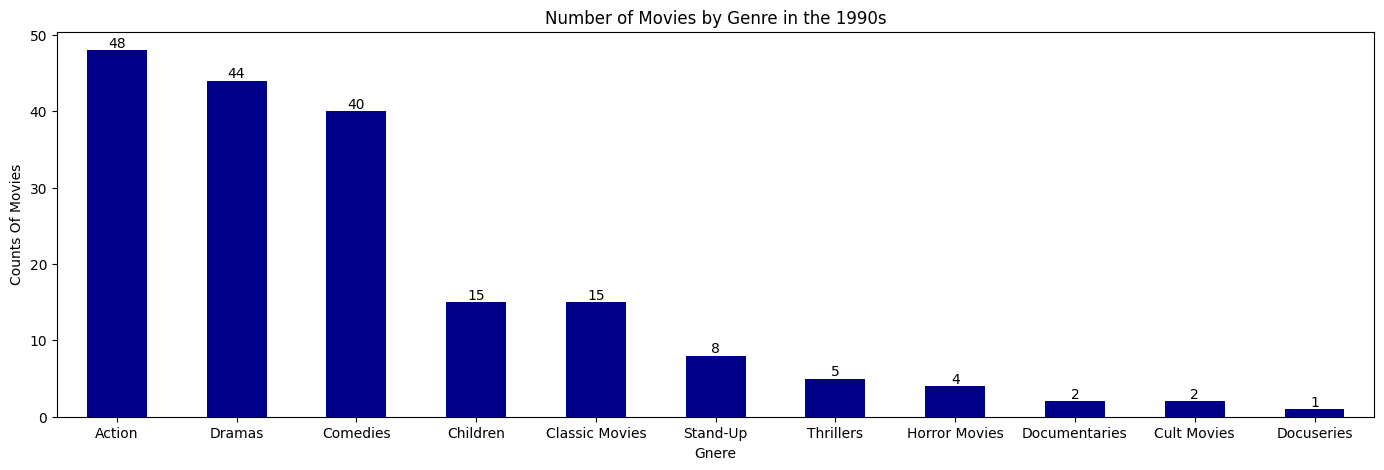

In [18]:
counts = df_90s['genre'].value_counts()
counts.plot(kind= 'bar' , figsize=(17,5) , rot= 0 , color="darkblue") 
plt.xlabel('Gnere')
plt.ylabel('Counts Of Movies')
plt.title('Number of Movies by Genre in the 1990s')
for i , n in enumerate(counts):
    plt.text(i,n,n , ha='center' , va='bottom')


Count the number of short action movies released in the 1990s.

In [14]:
short_action_movies = (df_90s["genre"] == "Action") & (df_90s["duration"] < 90)
short_action_movies

6       False
118     False
145     False
167     False
194     False
        ...  
4672    False
4689    False
4718    False
4746    False
4756    False
Length: 184, dtype: bool

In [15]:
short_movie_count = short_action_movies.sum()
short_movie_count

np.int64(7)

Only 7 Short Action Movies in the 1990s